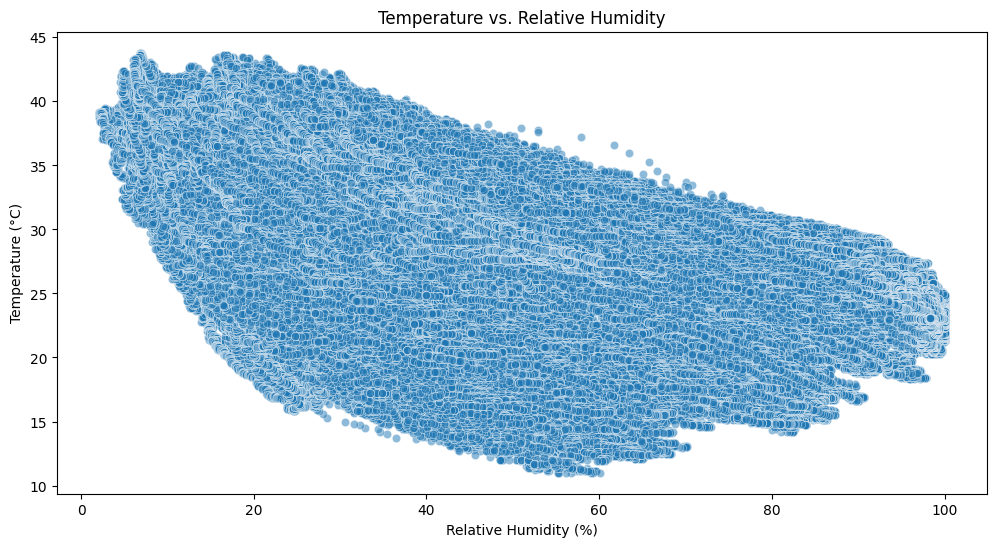

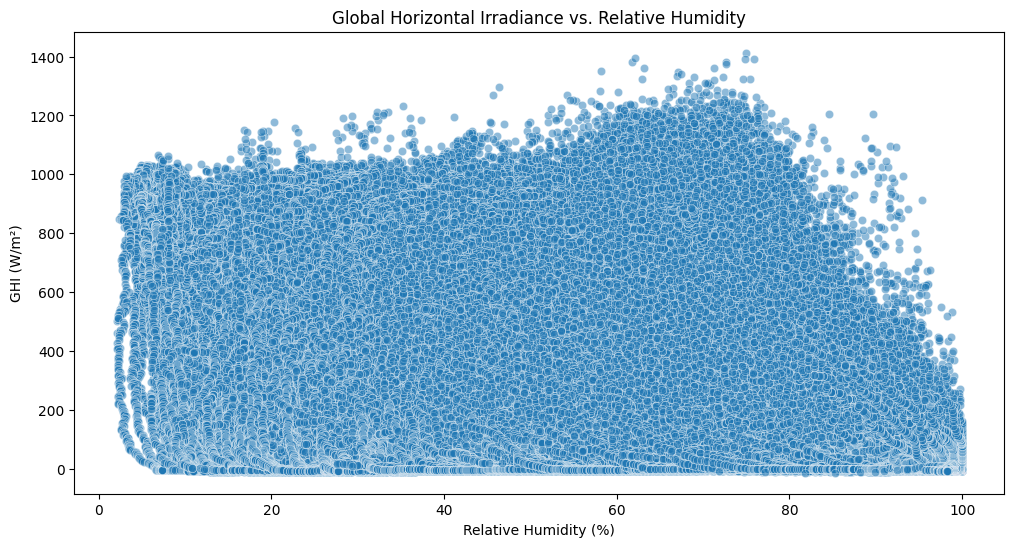

Correlation matrix for cleaned_benin-malanville.csv:
            RH      Tamb       GHI
RH    1.000000 -0.414842 -0.360029
Tamb -0.414842  1.000000  0.547513
GHI  -0.360029  0.547513  1.000000


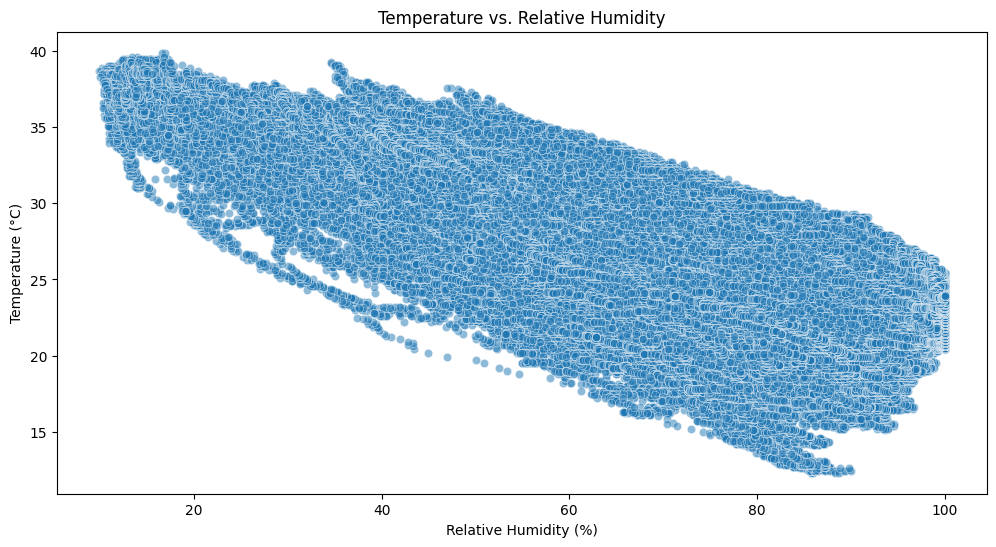

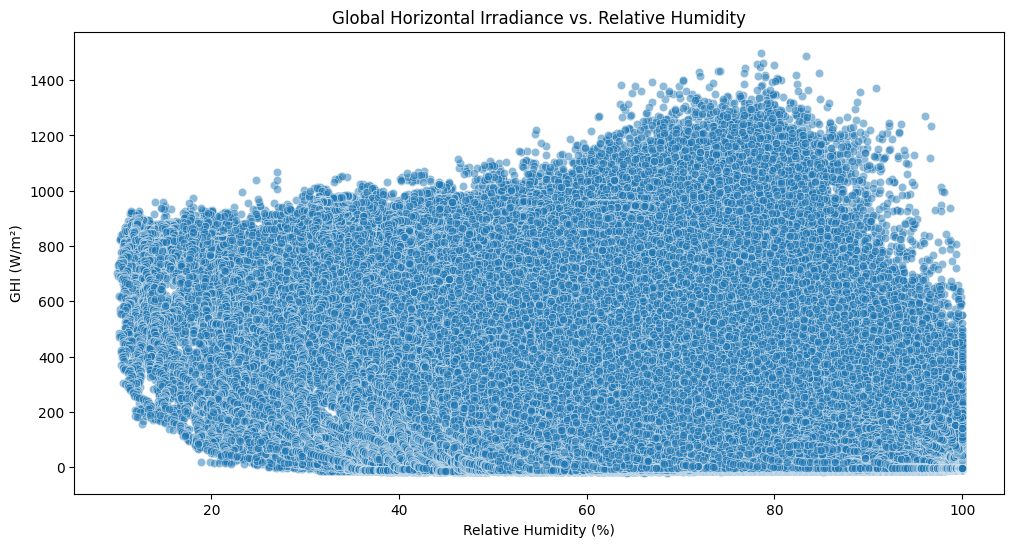

Correlation matrix for cleaned_sierraleone-bumbuna.csv:
            RH      Tamb       GHI
RH    1.000000 -0.791937 -0.546677
Tamb -0.791937  1.000000  0.641261
GHI  -0.546677  0.641261  1.000000


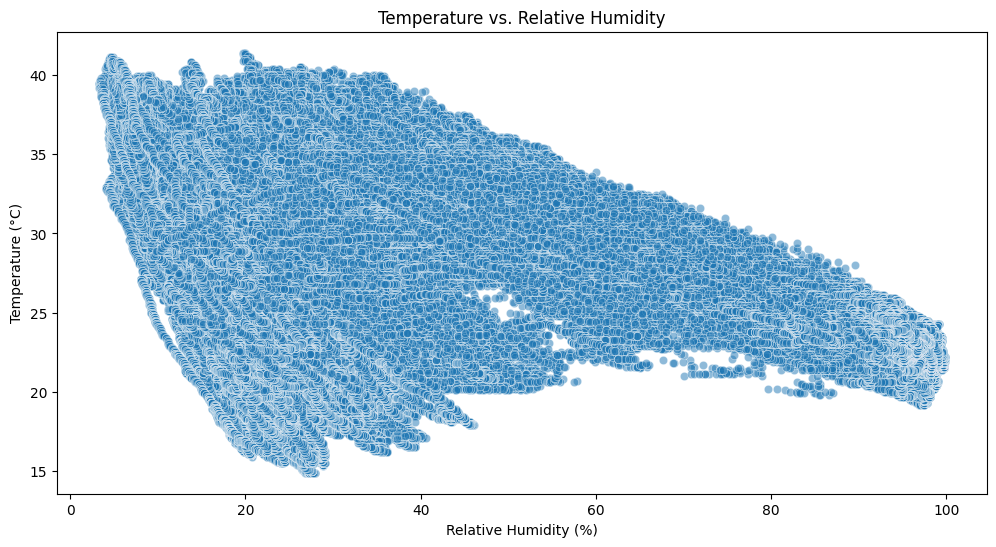

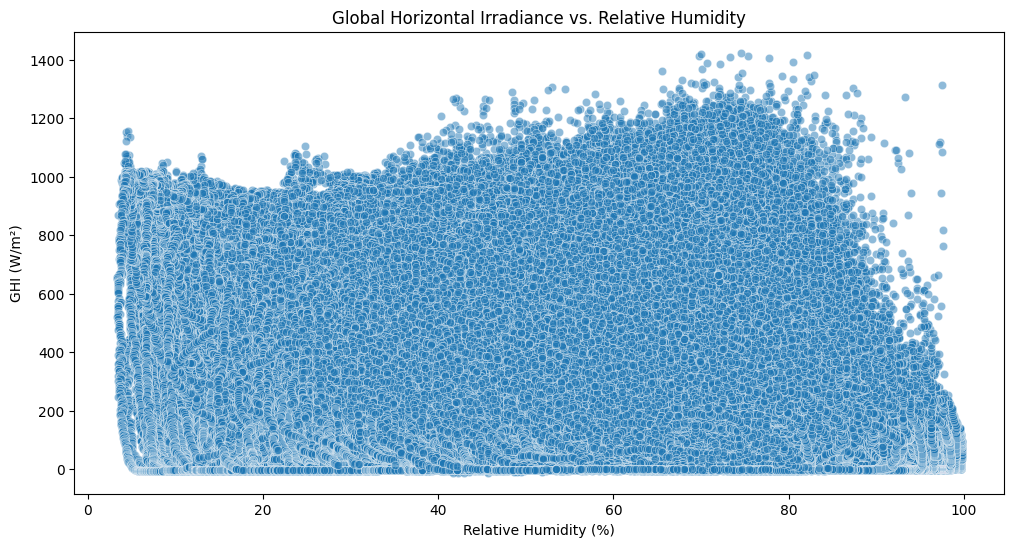

Correlation matrix for cleaned_togo-dapaong_qc.csv:
            RH      Tamb       GHI
RH    1.000000 -0.400410 -0.258077
Tamb -0.400410  1.000000  0.562533
GHI  -0.258077  0.562533  1.000000


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

class DataFolderProcessor:
    def __init__(self, folder_name='cleaned_data'):
        self.current_directory = os.getcwd()
        self.data_folder_path = os.path.join(self.current_directory, folder_name)
        self.csv_files = [f for f in os.listdir(self.data_folder_path) if f.endswith('.csv')]

    def process_file(self, csv_file):
        file_path = os.path.join(self.data_folder_path, csv_file)
        df = pd.read_csv(file_path)
        return df

# Plotting Temperature vs. Relative Humidity
def Temperature_relativity(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='RH', y='Tamb', data=df, alpha=0.5)
    plt.title('Temperature vs. Relative Humidity')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('Temperature (°C)')
    plt.show()

# Plotting Solar Radiation vs. Relative Humidity
def Solar_radiation_relative_humidity(df):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.5) 
    plt.title('Global Horizontal Irradiance vs. Relative Humidity')
    plt.xlabel('Relative Humidity (%)')
    plt.ylabel('GHI (W/m²)')
    plt.show()

# Example usage
processor = DataFolderProcessor()
csv_files = processor.csv_files

for csv_file in csv_files:
    df = processor.process_file(csv_file)
    
    # Convert Timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Call the plotting functions
    Temperature_relativity(df)
    Solar_radiation_relative_humidity(df)
    
    # Correlation analysis
    correlation_matrix = df[['RH', 'Tamb', 'GHI']].corr()
    print(f'Correlation matrix for {csv_file}:')
    print(correlation_matrix)